### Comandos básicos para el análisis exploratorio de datos y visualización de activos de renta variable

In [1]:
# Lo primero que hacemos es cargar las librerías deseadas
import yfinance as yf
import pandas as pd
from pandas import json_normalize
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# visualizamos todas las columnas de los métodos en análisis 
pd.set_option('display.max_columns', None)

##### Dependiendo las necesidades que tengamos podemos hacer distintos usos de la librería:

* Método download: Nos permite realizar una descarga de datos históricos de un activo o una lista de activos para un intervalo de tiempo
* Método Ticker: Nos permite a acceder a información específica sobre un activo en particular (Balances, diviendos, precios, etc.)
* Método Tickers: Es similar al método Ticker pero nos permite acceder a información específica de una serie de activos

##### Algunas páginas que nos pueden ayudar con la documentación de la API:

* https://www.qmr.ai/yfinance-library-the-definitive-guide/ 
* https://aroussi.com/post/python-yahoo-finance
* https://algotrading101.com/learn/yfinance-guide/
* https://github.com/ranaroussi/yfinance

##### Agunas consideraciones a tener en cuenta:

* yfinance no es una librería oficial de yahoo finance sino más bien que es el resultado del trabajo de Ran Aroussi.
* El hecho de que no sea una librería oficial hace que no podamos confiar al 100% en esta data y que podamos tener algunos inconvenientes producto de que muchas soluciones son scraps de la página de yahoo finance
* En la wiki del github de ranaroussi podemos obtener documentación extra de los parámetros de cada uno de los métodos que vamos a ver

In [3]:
# Trabajamos con el método ticker
msft = yf.Ticker("MSFT")
msft

yfinance.Ticker object <MSFT>

In [4]:
# Accedemos a la data de mercado del ticker en análisis y comenzamos a análizar como es que se dispone la información de esta biblioteca.
# Por default, el parámetro "interval" esta seteado en '1d'
hist = msft.history(period="1mo")
hist

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2025-03-03 00:00:00-05:00,398.820007,398.820007,386.160004,388.489990,23007700,0.0,0.0
2025-03-04 00:00:00-05:00,383.399994,392.579987,381.000000,388.609985,29342900,0.0,0.0
2025-03-05 00:00:00-05:00,389.339996,401.670013,388.809998,401.019989,23433100,0.0,0.0
2025-03-06 00:00:00-05:00,394.279999,402.149994,392.679993,396.890015,23304600,0.0,0.0
2025-03-07 00:00:00-05:00,392.320007,394.799988,385.540009,393.309998,22034100,0.0,0.0
2025-03-10 00:00:00-04:00,385.839996,386.399994,377.220001,380.160004,32840100,0.0,0.0
2025-03-11 00:00:00-04:00,379.000000,386.000000,376.910004,380.450012,30380200,0.0,0.0
2025-03-12 00:00:00-04:00,382.950012,385.220001,378.950012,383.269989,24253600,0.0,0.0
2025-03-13 00:00:00-04:00,383.160004,385.320007,377.450012,378.769989,20473000,0.0,0.0


In [5]:
# Algo relevante es que según la documentación no deberíamos mezclar el parámetro "period" con los parámetros "start" y "end".
# Por ejemplo, podemos hacer lo mismo si...
hist = msft.history(start="2024-01-02", end="2024-02-02")
hist

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-01-02 00:00:00-05:00,370.342443,372.363258,363.319154,367.380585,25258600,0.0,0.0
2024-01-03 00:00:00-05:00,365.538153,369.748167,365.042857,367.113190,23083500,0.0,0.0
2024-01-04 00:00:00-05:00,367.182474,369.589604,363.715405,364.478149,20901500,0.0,0.0
2024-01-05 00:00:00-05:00,365.498501,368.559424,363.051739,364.289978,20987000,0.0,0.0
2024-01-08 00:00:00-05:00,365.825371,371.669884,365.538121,371.164673,23134000,0.0,0.0
2024-01-09 00:00:00-05:00,368.509869,372.452403,367.697577,372.254303,20830000,0.0,0.0
2024-01-10 00:00:00-05:00,372.828832,380.555462,372.779314,379.168610,25514200,0.0,0.0
2024-01-11 00:00:00-05:00,382.368275,387.004235,376.801156,381.011169,27850800,0.0,0.0
2024-01-12 00:00:00-05:00,381.863060,385.023049,381.030967,384.815033,21645700,0.0,0.0


In [6]:
# También podríamos hacer lo mismo pero con un intervalo menor. EL tema de utilizar intervalos de tiempo distinto es útil
# al momento de realizar estratégias de AT
hist = msft.history(start="2024-01-01", end="2024-02-01", interval='1h')
hist

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Datetime,,,,,,,
2024-01-02 09:30:00-05:00,375.500000,375.899994,366.770996,368.299988,6438914,0.0,0.0
2024-01-02 10:30:00-05:00,368.250000,369.980011,367.000000,369.970001,2726569,0.0,0.0
2024-01-02 11:30:00-05:00,369.959991,371.359985,369.899994,370.476990,1957295,0.0,0.0
2024-01-02 12:30:00-05:00,370.474609,371.019989,369.140015,369.630005,1609221,0.0,0.0
2024-01-02 13:30:00-05:00,369.635010,370.200012,368.890015,369.549988,1243301,0.0,0.0
...,...,...,...,...,...,...,...
2024-01-31 11:30:00-05:00,403.678009,403.804993,402.000000,402.119507,3339540,0.0,0.0
2024-01-31 12:30:00-05:00,402.117004,403.609985,401.320007,403.173187,2988330,0.0,0.0
2024-01-31 13:30:00-05:00,403.200012,403.299988,400.510010,401.220001,3059113,0.0,0.0


In [7]:
# Si queremos analizar multiples activos al mismo tiempo tenemos que hacer uso del método Tickers
assets = ['AMZN','MSFT','WMT','GGAL','META']
tickers = yf.Tickers(assets)
tickers_hist = tickers.history(period='1mo')
tickers_hist

[*********************100%***********************]  5 of 5 completed


Price            Close                                                \
Ticker            AMZN       GGAL        META        MSFT        WMT   
Date                                                                   
2025-03-03  205.020004  56.560001  654.467712  388.489990  97.322739   
2025-03-04  203.800003  55.799999  639.431091  388.609985  94.709915   
2025-03-05  208.360001  58.349998  655.886475  401.019989  95.717155   
2025-03-06  200.699997  56.820000  627.371826  396.890015  94.380821   
2025-03-07  199.250000  57.630001  625.103821  393.309998  91.468819   
2025-03-10  194.539993  54.110001  597.458435  380.160004  87.579498   
2025-03-11  196.589996  54.389999  605.171631  380.450012  87.200539   
2025-03-12  198.889999  57.779999  619.009277  383.269989  84.966667   
2025-03-13  193.889999  57.139999  590.114990  378.769989  84.268585   
2025-03-14  197.949997  59.419998  607.599976  388.559998  85.116257   
2025-03-17  195.740005  58.299999  604.900024  388.700012  87.220482   
2025-03-18  192.820007  54.810001  582.359985  383.519989  85.355598   
2025-03-19  195.539993  57.720001  584.059998  387.820007  86.093582   
2025-03-20  194.949997  56.360001  586.000000  386.839996  85.574997   
2025-03-21  196.210007  58.560001  596.250000  391.260010  85.980003   
2025-03-24  203.259995  57.740002  618.849976  393.079987  87.489998   
2025-03-25  205.710007  58.950001  626.309998  395.160004  84.760002   
2025-03-26  201.130005  57.779999  610.979980  389.970001  85.209999   
2025-03-27  201.360001  56.419998  602.580017  390.579987  85.629997   
2025-03-28  192.720001  55.779999  576.739990  378.799988  85.150002   
2025-03-31  190.259995  54.470001  576.359985  375.390015  87.790001   
2025-04-01  192.169998  55.209999  586.000000  382.190002  88.830002   
2025-04-02  195.419998  54.974998  588.150024  382.945007  89.294998   

Price      Dividends                                High             \
Ticker          AMZN GGAL   META MSFT    WMT        AMZN       GGAL   
Date                                                                  
2025-03-03       0.0  0.0  0.000  0.0  0.000  214.009995  60.820000   
2025-03-04       0.0  0.0  0.000  0.0  0.000  206.800003  56.990002   
2025-03-05       0.0  0.0  0.000  0.0  0.000  209.979996  58.580002   
2025-03-06       0.0  0.0  0.000  0.0  0.000  205.770004  59.419998   
2025-03-07       0.0  0.0  0.000  0.0  0.000  202.270004  59.610001   
2025-03-10       0.0  0.0  0.000  0.0  0.000  196.729996  56.750000   
2025-03-11       0.0  0.0  0.000  0.0  0.000  200.179993  55.740002   
2025-03-12       0.0  0.0  0.000  0.0  0.000  201.520004  58.610001   
2025-03-13       0.0  0.0  0.000  0.0  0.000  198.880005  58.480000   
2025-03-14       0.0  0.0  0.525  0.0  0.000  198.649994  59.919998   
2025-03-17       0.0  0.0  0.000  0.0  0.000  199.000000  59.599998   
2025-03-18       0.0  0.0  0.000  0.0  0.000  194.000000  58.060001   
2025-03-19       0.0  0.0  0.000  0.0  0.000  195.970001  58.110001   
2025-03-20       0.0  0.0  0.000  0.0  0.000  199.320007  57.529999   
2025-03-21       0.0  0.0  0.000  0.0  0.235  196.990005  58.599998   
2025-03-24       0.0  0.0  0.000  0.0  0.000  203.639999  60.700001   
2025-03-25       0.0  0.0  0.000  0.0  0.000  206.210007  60.000000   
2025-03-26       0.0  0.0  0.000  0.0  0.000  206.009995  59.570000   
2025-03-27       0.0  0.0  0.000  0.0  0.000  203.789993  60.299999   
2025-03-28       0.0  0.0  0.000  0.0  0.000  199.259995  56.570000   
2025-03-31       0.0  0.0  0.000  0.0  0.000  191.330002  55.009998   
2025-04-01       0.0  0.0  0.000  0.0  0.000  193.929993  56.340000   
2025-04-02       0.0  0.0  0.000  0.0  0.000  195.999405  55.599998   

Price                                                 Low             \
Ticker            META        MSFT        WMT        AMZN       GGAL   
Date                                                                   
2025-03-03  680.644435  398.820007  99.217537  202.550003  56.04

In [8]:
# Esto es algo que ocurre en python que nos permite trabajar con múltiples índices. En este caso tenemos un indice en las filas (date)
# y tenemos varios indices en las columnas. Una método útil de pandas para modelar esto es "stack". Es como que funciona para refundir 
# el indice de las columnas en filas.
tickers_hist.stack(future_stack=True, level=1)

Price                   Close  Dividends        High         Low        Open  \
Date       Ticker                                                              
2025-03-03 AMZN    205.020004        0.0  214.009995  202.550003  213.350006   
           GGAL     56.560001        0.0   60.820000   56.040001   59.009998   
           META    654.467712        0.0  680.644435  650.261494  673.081157   
           MSFT    388.489990        0.0  398.820007  386.160004  398.820007   
           WMT      97.322739        0.0   99.217537   96.564825   97.711678   
...                       ...        ...         ...         ...         ...   
2025-04-02 AMZN    195.419998        0.0  195.999405  187.699997  187.850006   
           GGAL     54.974998        0.0   55.599998   54.500000   55.000000   
           META    588.150024        0.0  589.659912  573.359985  574.599976   
           MSFT    382.945007        0.0  383.040009  376.619995  377.964996   
           WMT      89.294998        0.0   90.139999   88.117500   88.199997   

Price              Stock Splits    Volume  
Date       Ticker                          
2025-03-03 AMZN             0.0  42948400  
           GGAL             0.0   1011300  
           META             0.0  10843800  
           MSFT             0.0  23007700  
           WMT              0.0  18372200  
...                         ...       ...  
2025-04-02 AMZN             0.0  21744507  
           GGAL             0.0    155863  
           META             0.0   6119508  
           MSFT             0.0   5692663  
           WMT              0.0   8416453  

[115 rows x 7 columns]

In [9]:
# Por otro lado, podemos eliminar indices con la función "reset_index". Esta función es como que funciona sobre los indices de las filas
tickers_hist.stack(future_stack=True, level=1).reset_index(level=1)

Price,Ticker,Close,Dividends,High,Low,Open,Stock Splits,Volume
Date,,,,,,,,
2025-03-03,AMZN,205.020004,0.0,214.009995,202.550003,213.350006,0.0,42948400
2025-03-03,GGAL,56.560001,0.0,60.820000,56.040001,59.009998,0.0,1011300
2025-03-03,META,654.467712,0.0,680.644435,650.261494,673.081157,0.0,10843800
2025-03-03,MSFT,388.489990,0.0,398.820007,386.160004,398.820007,0.0,23007700
2025-03-03,WMT,97.322739,0.0,99.217537,96.564825,97.711678,0.0,18372200
...,...,...,...,...,...,...,...,...
2025-04-02,AMZN,195.419998,0.0,195.999405,187.699997,187.850006,0.0,21744507
2025-04-02,GGAL,54.974998,0.0,55.599998,54.500000,55.000000,0.0,155863
2025-04-02,META,588.150024,0.0,589.659912,573.359985,574.599976,0.0,6119508


In [10]:
# No obstante, esto lo podemos hacer con varios niveles...
tickers_final = tickers_hist.stack(future_stack=True, level=1).reset_index(level=[0,1])
tickers_final

Price,Date,Ticker,Close,Dividends,High,Low,Open,Stock Splits,Volume
0,2025-03-03,AMZN,205.020004,0.0,214.009995,202.550003,213.350006,0.0,42948400
1,2025-03-03,GGAL,56.560001,0.0,60.820000,56.040001,59.009998,0.0,1011300
2,2025-03-03,META,654.467712,0.0,680.644435,650.261494,673.081157,0.0,10843800
3,2025-03-03,MSFT,388.489990,0.0,398.820007,386.160004,398.820007,0.0,23007700
4,2025-03-03,WMT,97.322739,0.0,99.217537,96.564825,97.711678,0.0,18372200
...,...,...,...,...,...,...,...,...,...
110,2025-04-02,AMZN,195.419998,0.0,195.999405,187.699997,187.850006,0.0,21744507
111,2025-04-02,GGAL,54.974998,0.0,55.599998,54.500000,55.000000,0.0,155863
112,2025-04-02,META,588.150024,0.0,589.659912,573.359985,574.599976,0.0,6119508
113,2025-04-02,MSFT,382.945007,0.0,383.040009,376.619995,377.964996,0.0,5692663


In [11]:
# En caso que querramos descargarnos esta información podemos utilizar el método de pandas "to_csv"
tickers_final.to_csv("tickers.csv")

In [12]:
# La última función que vimos podemos utilizar para descargar datos es el método download
data_ggal = yf.download('GGAL.BA', period='1mo')
data_ggal

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,GGAL.BA,GGAL.BA,GGAL.BA,GGAL.BA,GGAL.BA
Date,,,,,
2025-03-05,7180.0,7230.0,6850.0,6930.0,1958184
2025-03-06,7070.0,7350.0,7010.0,7200.0,2167031
2025-03-07,7040.0,7340.0,6840.0,7150.0,2258884
2025-03-10,6620.0,6930.0,6490.0,6880.0,3615906
2025-03-11,6690.0,6850.0,6530.0,6700.0,2527752
2025-03-12,7110.0,7200.0,6810.0,6850.0,3371560
2025-03-13,7070.0,7210.0,6960.0,7010.0,2283870
2025-03-14,7380.0,7410.0,7160.0,7220.0,1817776


In [13]:
# Esto mismo también lo podemos hacer con multiples activos
tickers_hist_download = yf.download(assets, period='1mo', auto_adjust=True)
tickers_hist_download

[*********************100%***********************]  5 of 5 completed


Price            Close                                                \
Ticker            AMZN       GGAL        META        MSFT        WMT   
Date                                                                   
2025-03-03  205.020004  56.560001  654.467712  388.489990  97.322739   
2025-03-04  203.800003  55.799999  639.431091  388.609985  94.709915   
2025-03-05  208.360001  58.349998  655.886475  401.019989  95.717155   
2025-03-06  200.699997  56.820000  627.371826  396.890015  94.380821   
2025-03-07  199.250000  57.630001  625.103821  393.309998  91.468819   
2025-03-10  194.539993  54.110001  597.458435  380.160004  87.579498   
2025-03-11  196.589996  54.389999  605.171631  380.450012  87.200539   
2025-03-12  198.889999  57.779999  619.009277  383.269989  84.966667   
2025-03-13  193.889999  57.139999  590.114990  378.769989  84.268585   
2025-03-14  197.949997  59.419998  607.599976  388.559998  85.116257   
2025-03-17  195.740005  58.299999  604.900024  388.700012  87.220482   
2025-03-18  192.820007  54.810001  582.359985  383.519989  85.355598   
2025-03-19  195.539993  57.720001  584.059998  387.820007  86.093582   
2025-03-20  194.949997  56.360001  586.000000  386.839996  85.574997   
2025-03-21  196.210007  58.560001  596.250000  391.260010  85.980003   
2025-03-24  203.259995  57.740002  618.849976  393.079987  87.489998   
2025-03-25  205.710007  58.950001  626.309998  395.160004  84.760002   
2025-03-26  201.130005  57.779999  610.979980  389.970001  85.209999   
2025-03-27  201.360001  56.419998  602.580017  390.579987  85.629997   
2025-03-28  192.720001  55.779999  576.739990  378.799988  85.150002   
2025-03-31  190.259995  54.470001  576.359985  375.390015  87.790001   
2025-04-01  192.169998  55.209999  586.000000  382.190002  88.830002   
2025-04-02  195.419998  54.974998  588.150024  382.945007  89.294998   

Price             High                                                \
Ticker            AMZN       GGAL        META        MSFT        WMT   
Date                                                                   
2025-03-03  214.009995  60.820000  680.644435  398.820007  99.217537   
2025-03-04  206.800003  56.990002  649.172424  392.579987  96.784221   
2025-03-05  209.979996  58.580002  658.913811  401.670013  96.126029   
2025-03-06  205.770004  59.419998  649.981715  402.149994  95.926579   
2025-03-07  202.270004  59.610001  634.225710  394.799988  93.692707   
2025-03-10  196.729996  56.750000  609.567657  386.399994  89.982902   
2025-03-11  200.179993  55.740002  614.383406  386.000000  89.105304   
2025-03-12  201.520004  58.610001  632.767057  385.220001  88.855988   
2025-03-13  198.880005  58.480000  619.948433  385.320007  85.215980   
2025-03-14  198.649994  59.919998  608.859985  390.230011  85.136206   
2025-03-17  199.000000  59.599998  613.099976  392.709991  87.749029   
2025-03-18  194.000000  58.060001  600.250000  387.369995  87.439879   
2025-03-19  195.970001  58.110001  592.320007  389.679993  86.552322   
2025-03-20  199.320007  57.529999  610.200012  391.790009  86.841523   
2025-03-21  196.990005  58.599998  597.539978  391.739990  86.230003   
2025-03-24  203.639999  60.700001  622.539978  395.399994  87.650002   
2025-03-25  206.210007  60.000000  633.880005  396.359985  87.309998   
2025-03-26  206.009995  59.570000  626.750000  395.309998  85.559998   
2025-03-27  203.789993  60.299999  614.250000  392.239990  86.110001   
2025-03-28  199.259995  56.570000  601.750000  389.130005  85.830002   
2025-03-31  191.330002  55.009998  578.700012  377.070007  88.199997   
2025-04-01  193.929993  56.340000  589.909973  382.850006  89.110001   
2025-04-02  195.999405  55.599998  589.659912  383.040009  90.139999   

Price              Low                                                \
Ticker            AMZN       GGAL        META        MSFT        WMT   
Date                                                                   
2025-03-03  202.550003  56.040001  650

In [14]:
# Vemos que acá tenemos el mismo inconveniente que teníamos antes. En esteo caso, esta función tiene un parámetro que se llama "groupby"
# que nos permite agrupar la información por ticker
tickers_hist_download = yf.download(assets, period='1mo', auto_adjust=True, group_by='tickers')
tickers_hist_download

[*********************100%***********************]  5 of 5 completed


Ticker            WMT                                                   META  \
Price            Open       High        Low      Close    Volume        Open   
Date                                                                           
2025-03-03  97.711678  99.217537  96.564825  97.322739  18372200  673.081157   
2025-03-04  95.497753  96.784221  94.201310  94.709915  25227700  644.936203   
2025-03-05  94.709919  96.126029  94.490521  95.717155  17639000  640.430254   
2025-03-06  94.540387  95.926579  93.922082  94.380821  19957800  647.423993   
2025-03-07  93.682740  93.692707  90.511449  91.468819  35913200  624.814101   
2025-03-10  89.514188  89.982902  86.372813  87.579498  35148800  607.529492   
2025-03-11  87.050948  89.105304  86.901357  87.200539  28687600  594.521072   
2025-03-12  87.639328  88.855988  84.647544  84.966667  33301600  629.340113   
2025-03-13  84.707383  85.215980  83.640313  84.268585  31507800  619.698655   
2025-03-14  84.727325  85.136206  83.829789  85.116257  35500600  602.799988   
2025-03-17  84.896861  87.749029  84.747278  87.220482  26297800  607.460022   
2025-03-18  87.200538  87.439879  85.265849  85.355598  17850900  600.049988   
2025-03-19  85.714618  86.552322  85.385527  86.093582  24555900  584.280029   
2025-03-20  85.574997  86.841523  85.285790  85.574997  18185500  582.760010   
2025-03-21  85.279999  86.230003  84.779999  85.980003  26797200  583.419983   
2025-03-24  86.470001  87.650002  86.349998  87.489998  17900700  614.969971   
2025-03-25  86.760002  87.309998  84.620003  84.760002  27908600  626.760010   
2025-03-26  85.190002  85.559998  84.570000  85.209999  27228800  624.890015   
2025-03-27  84.779999  86.110001  84.779999  85.629997  16782800  602.000000   
2025-03-28  85.430000  85.830002  84.699997  85.150002  14790600  600.309998   
2025-03-31  84.760002  88.199997  84.370003  87.790001  30269300  563.500000   
2025-04-01  87.540001  89.110001  87.370003  88.830002  22072700  570.840027   
2025-04-02  88.199997  90.139999  88.117500  89.294998   8416453  574.599976   

Ticker                                                         GGAL  \
Price             High         Low       Close    Volume       Open   
Date                                                                  
2025-03-03  680.644435  650.261494  654.467712  10843800  59.009998   
2025-03-04  649.172424  623.095650  639.431091  21495200  55.369999   
2025-03-05  658.913811  637.093196  655.886475  13770000  56.619999   
2025-03-06  649.981715  623.555214  627.371826  13446500  57.910000   
2025-03-07  634.225710  600.076100  625.103821  21375700  58.410000   
2025-03-10  609.567657  586.348325  597.458435  21999900  55.660000   
2025-03-11  614.383406  592.802630  605.171631  17401500  53.980000   
2025-03-12  632.767057  608.808331  619.009277  15747000  55.840000   
2025-03-13  619.948433  585.988657  590.114990  16480300  57.889999   
2025-03-14  608.859985  594.780029  607.599976  12364500  58.279999   
2025-03-17  613.099976  598.000000  604.900024  15473900  58.980000   
2025-03-18  600.250000  574.659973  582.359985  20297700  57.889999   
2025-03-19  592.320007  574.770020  584.059998  20537500  55.520000   
2025-03-20  610.200012  579.510010  586.000000  24336500  57.060001   
2025-03-21  597.539978  580.950012  596.250000  25015900  55.990002   
2025-03-24  622.539978  612.200012  618.849976  15741300  59.450001   
2025-03-25  633.880005  621.179993  626.309998  15312500  58.430000   
2025-03-26  626.750000  606.609985  610.979980  12609800  59.349998   
2025-03-27  614.250000  600.099976  602.580017  10436500  59.540001   
2025-03-28  601.750000  573.919983  576.739990  17602800  56.230000   
2025-03-31  578.700012  553.299988  576.359985  21124700  55.009998   
2025-04-01  589.909973  570.000000  586.000000  12816400  55.000000   
2025-04-02  589.659912  573.359985  588.150024   6119508  55.000000   

Ticker                                                      MSFT        

##### Sobre el método Ticker podemos obtener fundamental data para realizar AF

In [15]:
# Traemos todos los datos juntos en formato json del activo en análisis
info_msft = msft.info

In [16]:
# Vemos de convertir esta información a un data frame para trabajarla de otra forma:
df_msft = pd.DataFrame([info_msft])
df_msft.head(10)

,address1,city,state,zip,country,phone,website,industry,industryKey,industryDisp,sector,sectorKey,sectorDisp,longBusinessSummary,fullTimeEmployees,companyOfficers,auditRisk,boardRisk,compensationRisk,shareHolderRightsRisk,overallRisk,governanceEpochDate,compensationAsOfEpochDate,irWebsite,executiveTeam,maxAge,priceHint,previousClose,open,dayLow,dayHigh,regularMarketPreviousClose,regularMarketOpen,regularMarketDayLow,regularMarketDayHigh,dividendRate,dividendYield,exDividendDate,payoutRatio,fiveYearAvgDividendYield,beta,trailingPE,forwardPE,volume,regularMarketVolume,averageVolume,averageVolume10days,averageDailyVolume10Day,bid,ask,bidSize,askSize,marketCap,fiftyTwoWeekLow,fiftyTwoWeekHigh,priceToSalesTrailing12Months,fiftyDayAverage,twoHundredDayAverage,trailingAnnualDividendRate,trailingAnnualDividendYield,currency,tradeable,enterpriseValue,profitMargins,floatShares,sharesOutstanding,sharesShort,sharesShortPriorMonth,sharesShortPreviousMonthDate,dateShortInterest,sharesPercentSharesOut,heldPercentInsiders,heldPercentInstitutions,shortRatio,shortPercentOfFloat,impliedSharesOutstanding,bookValue,priceToBook,lastFiscalYearEnd,nextFiscalYearEnd,mostRecentQuarter,earningsQuarterlyGrowth,netIncomeToCommon,trailingEps,forwardEps,lastSplitFactor,lastSplitDate,enterpriseToRevenue,enterpriseToEbitda,52WeekChange,SandP52WeekChange,lastDividendValue,lastDividendDate,quoteType,currentPrice,targetHighPrice,targetLowPrice,targetMeanPrice,targetMedianPrice,recommendationMean,recommendationKey,numberOfAnalystOpinions,totalCash,totalCashPerShare,ebitda,totalDebt,quickRatio,currentRatio,totalRevenue,debtToEquity,revenuePerShare,returnOnAssets,returnOnEquity,grossProfits,freeCashflow,operatingCashflow,earningsGrowth,revenueGrowth,grossMargins,ebitdaMargins,operatingMargins,financialCurrency,symbol,language,region,typeDisp,quoteSourceName,triggerable,customPriceAlertConfidence,longName,shortName,exchange,messageBoardId,exchangeTimezoneName,exchangeTimezoneShortName,gmtOffSetMilliseconds,market,esgPopulated,regularMarketChangePercent,regularMarketPrice,corporateActions,regularMarketTime,marketState,hasPrePostMarketData,firstTradeDateMilliseconds,regularMarketChange,regularMarketDayRange,fullExchangeName,averageDailyVolume3Month,fiftyTwoWeekLowChange,fiftyTwoWeekLowChangePercent,fiftyTwoWeekRange,fiftyTwoWeekHighChange,fiftyTwoWeekHighChangePercent,fiftyTwoWeekChangePercent,dividendDate,earningsTimestamp,earningsTimestampStart,earningsTimestampEnd,earningsCallTimestampStart,earningsCallTimestampEnd,isEarningsDateEstimate,epsTrailingTwelveMonths,epsForward,epsCurrentYear,priceEpsCurrentYear,fiftyDayAverageChange,fiftyDayAverageChangePercent,twoHundredDayAverageChange,twoHundredDayAverageChangePercent,sourceInterval,exchangeDataDelayedBy,averageAnalystRating,cryptoTradeable,displayName,trailingPegRatio
0,One Microsoft Way,Redmond,WA,98052-6399,United States,425 882 8080,https://www.microsoft.com,Software - Infrastructure,software-infrastructure,Software - Infrastructure,Technology,technology,Technology,Microsoft Corporation develops and supports so...,228000,"[{'maxAge': 1, 'name': 'Mr. Satya Nadella', '...",9,5,4,2,3,1743465600,1735603200,http://www.microsoft.com/investor/default.aspx,[],86400,2,382.19,377.965,376.62,383.04,382.19,377.965,376.62,383.04,3.32,0.87,1747267200,0.2482,0.84,0.914,30.832932,25.615051,5692753,5692766,23159393,22046520,22046520,381.5,383.97,1,4,2846805458944,367.24,468.35,10.873887,403.9234,421.9399,3.16,0.008268,USD,False,2872547737600,0.35428,7423574660,7433979904,64256703,53633341,1739491200,1741910400,0.0086,0.00063,0.74408,2.58,0.0086,7433979904,40.712,9.406195,1719705600,1751241600,1735603200,0.102,92749996032,12.42,14.95,2:1,1045526400,10.972,20.223,-0.090998,0.080894,0.83,1740009600,EQUITY,382.945,650.0,415.0,503.86472,500.0,1.44068,strong_buy,51,71554998272,9.625,142041006080,102909001728,1.204,1.351,261802000384,33.998,35.224,0.14649,0.34291,181714993152,51958124544,125582999552,0.102,0.123,0.69409,0.54255,0.45458,

In [17]:
# Vemos como normalizar la información que nos llega en formato json. El formato json significa "JavaScript Objet Notation" y es similar
# a una lista de diccionarios en python. Podemos modificar esto dentro del dataFrame haciendo lo siguiente. Esto nos va a crear una nueva
# columna por cada nuevo diccionario que tengamos.
df_normalized = pd.concat([df_msft.drop(['companyOfficers'], axis=1),
                          json_normalize(df_msft['companyOfficers'])],
                          axis=1)
df_normalized.head(10)

,address1,city,state,zip,country,phone,website,industry,industryKey,industryDisp,sector,sectorKey,sectorDisp,longBusinessSummary,fullTimeEmployees,auditRisk,boardRisk,compensationRisk,shareHolderRightsRisk,overallRisk,governanceEpochDate,compensationAsOfEpochDate,irWebsite,executiveTeam,maxAge,priceHint,previousClose,open,dayLow,dayHigh,regularMarketPreviousClose,regularMarketOpen,regularMarketDayLow,regularMarketDayHigh,dividendRate,dividendYield,exDividendDate,payoutRatio,fiveYearAvgDividendYield,beta,trailingPE,forwardPE,volume,regularMarketVolume,averageVolume,averageVolume10days,averageDailyVolume10Day,bid,ask,bidSize,askSize,marketCap,fiftyTwoWeekLow,fiftyTwoWeekHigh,priceToSalesTrailing12Months,fiftyDayAverage,twoHundredDayAverage,trailingAnnualDividendRate,trailingAnnualDividendYield,currency,tradeable,enterpriseValue,profitMargins,floatShares,sharesOutstanding,sharesShort,sharesShortPriorMonth,sharesShortPreviousMonthDate,dateShortInterest,sharesPercentSharesOut,heldPercentInsiders,heldPercentInstitutions,shortRatio,shortPercentOfFloat,impliedSharesOutstanding,bookValue,priceToBook,lastFiscalYearEnd,nextFiscalYearEnd,mostRecentQuarter,earningsQuarterlyGrowth,netIncomeToCommon,trailingEps,forwardEps,lastSplitFactor,lastSplitDate,enterpriseToRevenue,enterpriseToEbitda,52WeekChange,SandP52WeekChange,lastDividendValue,lastDividendDate,quoteType,currentPrice,targetHighPrice,targetLowPrice,targetMeanPrice,targetMedianPrice,recommendationMean,recommendationKey,numberOfAnalystOpinions,totalCash,totalCashPerShare,ebitda,totalDebt,quickRatio,currentRatio,totalRevenue,debtToEquity,revenuePerShare,returnOnAssets,returnOnEquity,grossProfits,freeCashflow,operatingCashflow,earningsGrowth,revenueGrowth,grossMargins,ebitdaMargins,operatingMargins,financialCurrency,symbol,language,region,typeDisp,quoteSourceName,triggerable,customPriceAlertConfidence,longName,shortName,exchange,messageBoardId,exchangeTimezoneName,exchangeTimezoneShortName,gmtOffSetMilliseconds,market,esgPopulated,regularMarketChangePercent,regularMarketPrice,corporateActions,regularMarketTime,marketState,hasPrePostMarketData,firstTradeDateMilliseconds,regularMarketChange,regularMarketDayRange,fullExchangeName,averageDailyVolume3Month,fiftyTwoWeekLowChange,fiftyTwoWeekLowChangePercent,fiftyTwoWeekRange,fiftyTwoWeekHighChange,fiftyTwoWeekHighChangePercent,fiftyTwoWeekChangePercent,dividendDate,earningsTimestamp,earningsTimestampStart,earningsTimestampEnd,earningsCallTimestampStart,earningsCallTimestampEnd,isEarningsDateEstimate,epsTrailingTwelveMonths,epsForward,epsCurrentYear,priceEpsCurrentYear,fiftyDayAverageChange,fiftyDayAverageChangePercent,twoHundredDayAverageChange,twoHundredDayAverageChangePercent,sourceInterval,exchangeDataDelayedBy,averageAnalystRating,cryptoTradeable,displayName,trailingPegRatio,0,1,2,3
0,One Microsoft Way,Redmond,WA,98052-6399,United States,425 882 8080,https://www.microsoft.com,Software - Infrastructure,software-infrastructure,Software - Infrastructure,Technology,technology,Technology,Microsoft Corporation develops and supports so...,228000,9,5,4,2,3,1743465600,1735603200,http://www.microsoft.com/investor/default.aspx,[],86400,2,382.19,377.965,376.62,383.04,382.19,377.965,376.62,383.04,3.32,0.87,1747267200,0.2482,0.84,0.914,30.832932,25.615051,5692753,5692766,23159393,22046520,22046520,381.5,383.97,1,4,2846805458944,367.24,468.35,10.873887,403.9234,421.9399,3.16,0.008268,USD,False,2872547737600,0.35428,7423574660,7433979904,64256703,53633341,1739491200,1741910400,0.0086,0.00063,0.74408,2.58,0.0086,7433979904,40.712,9.406195,1719705600,1751241600,1735603200,0.102,92749996032,12.42,14.95,2:1,1045526400,10.972,20.223,-0.090998,0.080894,0.83,1740009600,EQUITY,382.945,650.0,415.0,503.86472,500.0,1.44068,strong_buy,51,71554998272,9.625,142041006080,102909001728,1.204,1.351,261802000384,33.998,35.224,0.14649,0.34291,181714993152,51958124544,125582999552,0.102,0.123,0.69409,0.54255,0.45458,USD,MSFT,en-US,US,Equity,Nasdaq Real Time Price,True,HIGH,M

In [18]:
# Si queremos acceder a los datos de forma particular sobre una acción podemos directamente acceder a las columnas del data frame
print(info_msft['dividendRate'])

# Otra forma es directamente utilizar los métodos sobre la opción ticker
print(msft.info['dividendRate'])

3.32
3.32


In [19]:
# También podemos ver la capitalización de mercado de este activo
print(info_msft['marketCap'])

# Otra forma es directamente utilizar los métodos sobre la opción ticker
print(msft.info['marketCap'])

2846805458944
2846805458944


In [20]:
# También podemos ver el beta de mercado de este activo
print(info_msft['beta'])

# Otra forma es directamente utilizar los métodos sobre la opción ticker
print(msft.info['beta'])

0.914
0.914


In [21]:
# También podemos ver el price to earnings del este activo
print(info_msft['forwardPE'])

# Otra forma es directamente utilizar los métodos sobre la opción ticker
print(msft.info['forwardPE'])

25.615051
25.615051


In [22]:
# Sobre el mimsmo ticker si tocamos tab nos salen varias opciones que podemos hacear click para analizar el activo
msft.balancesheet

,2024-06-30,2023-06-30,2022-06-30,2021-06-30
Ordinary Shares Number,7434138859.0,7432000000.0,7464000000.0,7519000000.0
Share Issued,7434138859.0,7432000000.0,7464000000.0,7519000000.0
Net Debt,33315000000.0,12533000000.0,35850000000.0,43922000000.0
Total Debt,67127000000.0,59965000000.0,61270000000.0,67775000000.0
Tangible Book Value,121660000000.0,128971000000.0,87720000000.0,84477000000.0
...,...,...,...,...
Cash Cash Equivalents And Short Term Investments,75531000000.0,111256000000.0,104749000000.0,130256000000.0
Other Short Term Investments,57216000000.0,76552000000.0,90818000000.0,116032000000.0
Cash And Cash Equivalents,18315000000.0,34704000000.0,13931000000.0,14224000000.0
Cash Equivalents,6744000000.0,26226000000.0,5673000000.0,6952000000.0


In [23]:
# Sucede que al ser una librería no oficial, existen actualmente diversas opciones de como acceder a los datos.
# Esta misma información es la que podemos obtener de: https://finance.yahoo.com/quote/MSFT/balance-sheet?p=MSFT
msft.get_balance_sheet()

,2024-06-30,2023-06-30,2022-06-30,2021-06-30
OrdinarySharesNumber,7434138859.0,7432000000.0,7464000000.0,7519000000.0
ShareIssued,7434138859.0,7432000000.0,7464000000.0,7519000000.0
NetDebt,33315000000.0,12533000000.0,35850000000.0,43922000000.0
TotalDebt,67127000000.0,59965000000.0,61270000000.0,67775000000.0
TangibleBookValue,121660000000.0,128971000000.0,87720000000.0,84477000000.0
...,...,...,...,...
CashCashEquivalentsAndShortTermInvestments,75531000000.0,111256000000.0,104749000000.0,130256000000.0
OtherShortTermInvestments,57216000000.0,76552000000.0,90818000000.0,116032000000.0
CashAndCashEquivalents,18315000000.0,34704000000.0,13931000000.0,14224000000.0
CashEquivalents,6744000000.0,26226000000.0,5673000000.0,6952000000.0


In [24]:
# También podemos tener esta misma visión pero en forma de trimestres
msft.quarterly_balancesheet

,2024-12-31,2024-09-30,2024-06-30,2024-03-31,2023-12-31,2023-09-30
Ordinary Shares Number,7434880776.0,7436000000.0,7434138859.0,7432305794.0,7431612107.0,NaN
Share Issued,7434880776.0,7436000000.0,7434138859.0,7432305794.0,7431612107.0,NaN
Net Debt,27488000000.0,24277000000.0,33315000000.0,45808000000.0,56914000000.0,NaN
Total Debt,62224000000.0,61478000000.0,67127000000.0,79911000000.0,88374000000.0,NaN
Tangible Book Value,158119000000.0,141598000000.0,121660000000.0,105161000000.0,89441000000.0,NaN
...,...,...,...,...,...,...
Cash Cash Equivalents And Short Term Investments,71551000000.0,78429000000.0,75531000000.0,80013000000.0,80982000000.0,NaN
Other Short Term Investments,54069000000.0,57589000000.0,57216000000.0,60379000000.0,63677000000.0,NaN
Cash And Cash Equivalents,17482000000.0,20840000000.0,18315000000.0,19634000000.0,17305000000.0,NaN
Cash Equivalents,7835000000.0,10252000000.0,6744000000.0,8053000000.0,7769000000.0,NaN


In [25]:
# También podemos ver el cashflow de la empresa. Que coincide con: https://finance.yahoo.com/quote/MSFT/cash-flow?p=MSFT
msft.get_cashflow()

,2024-06-30,2023-06-30,2022-06-30,2021-06-30,2020-06-30
FreeCashFlow,74071000000.0,59475000000.0,65149000000.0,56118000000.0,NaN
RepurchaseOfCapitalStock,-17254000000.0,-22245000000.0,-32696000000.0,-27385000000.0,NaN
RepaymentOfDebt,-29070000000.0,-2750000000.0,-9023000000.0,-3750000000.0,NaN
IssuanceOfDebt,29645000000.0,0.0,0.0,NaN,0.0
IssuanceOfCapitalStock,2002000000.0,1866000000.0,1841000000.0,1693000000.0,NaN
CapitalExpenditure,-44477000000.0,-28107000000.0,-23886000000.0,-20622000000.0,NaN
EndCashPosition,18315000000.0,34704000000.0,13931000000.0,14224000000.0,NaN
BeginningCashPosition,34704000000.0,13931000000.0,14224000000.0,13576000000.0,NaN
EffectOfExchangeRateChanges,-210000000.0,-194000000.0,-141000000.0,-29000000.0,NaN
ChangesInCash,-16179000000.0,20967000000.0,-152000000.0,677000000.0,NaN


In [26]:
# Algo importante también es poder ver los fondos institucionales que tienen mayor porcentaje del paquete accionario
# Esto también lo podemos ver: https://finance.yahoo.com/quote/MSFT/holders?p=MSFT
msft.get_institutional_holders()

,Date Reported,Holder,pctHeld,Shares,Value,pctChange
0,2024-12-31,Vanguard Group Inc,0.0920,684071705,261961489185,0.0155
1,2024-12-31,Blackrock Inc.,0.0775,576226642,220662816695,0.0263
2,2024-12-31,State Street Corporation,0.0397,295109622,113010603255,0.0194
3,2024-12-31,"FMR, LLC",0.0266,197512226,75636218363,-0.0667
4,2024-12-31,"Geode Capital Management, LLC",0.0226,168128024,64383700157,0.0188
5,2024-12-31,Price (T.Rowe) Associates Inc,0.0182,135151848,51755655305,-0.0037
6,2024-12-31,JPMORGAN CHASE & CO,0.0182,134943661,51675931241,-0.0211
7,2024-12-31,Morgan Stanley,0.0169,125501255,48060013905,0.0117
8,2024-12-31,NORGES BANK,0.0142,105202984,40286902899,0.0838
9,2024-12-31,Northern Trust Corporation,0.0113,83787746,32086055536,0.1607


In [27]:
# Esta misma información la podemos disponibilizar para poder acceder para multiples activos. Para eso vamos a introducir
# para que sirven los bucles for:
for i in assets:
    print(i)

AMZN
MSFT
WMT
GGAL
META


In [28]:
# El método from_dict nos facilita el pasaje a dataframes desde un diccionario. Por otro lado, el parámetro concat es 
# necesario que se le específique axis = 1 si queremos concatenar columnas y no filas. La consulta quedaría así:
info_tickers_final = pd.DataFrame()
x = 0

for i in assets:

    if x == 0:
        ticker_asset = yf.Ticker(i)
        ticker_asset_t = pd.DataFrame.from_dict(ticker_asset.info, orient="index")
        ticker_asset_t.reset_index(inplace=True)
        ticker_asset_t.columns = ["Atributo", i]
        info_tickers_final = pd.concat([info_tickers_final, ticker_asset_t], axis = 1)
        x = 1
    else:
        ticker_asset = yf.Ticker(i)
        ticker_asset_t = pd.DataFrame.from_dict(ticker_asset.info, orient="index")
        ticker_asset_t.reset_index(inplace=True)
        ticker_asset_t.columns = ["Atributo", i]
        info_tickers_final = pd.concat([info_tickers_final, ticker_asset_t[i]], axis = 1)

info_tickers_final.head(20)

,Atributo,AMZN,MSFT,WMT,GGAL,META
0,address1,410 Terry Avenue North,One Microsoft Way,702 South West 8th Street,Teniente General Juan D. Perón 430,1 Meta Way
1,city,Seattle,Redmond,Bentonville,25th Floor,Menlo Park
2,state,WA,WA,AR,Buenos Aires,CA
3,zip,98109-5210,98052-6399,72716,1038,94025
4,country,United States,United States,United States,Argentina,United States
5,phone,206 266 1000,425 882 8080,(479) 273-4000,54 11 4343 7528,650 543 4800
6,website,https://www.aboutamazon.com,https://www.microsoft.com,https://corporate.walmart.com,54 11 4331 9183,https://investor.atmeta.com
7,industry,Internet Retail,Software - Infrastructure,Discount Stores,https://www.gfgsa.com,Internet Content & Information
8,industryKey,internet-retail,software-infrastructure,discount-stores,Banks - Regional,internet-content-information
9,industryDisp,Internet Retail,Software - Infrastructure,Discount Stores,banks-regional,Internet Content & Information


In [29]:
data_ggal.index

DatetimeIndex(['2025-03-05', '2025-03-06', '2025-03-07', '2025-03-10',
               '2025-03-11', '2025-03-12', '2025-03-13', '2025-03-14',
               '2025-03-17', '2025-03-18', '2025-03-19', '2025-03-20',
               '2025-03-21', '2025-03-25', '2025-03-26', '2025-03-27',
               '2025-03-28', '2025-03-31', '2025-04-01'],
              dtype='datetime64[ns]', name='Date', freq=None)

##### Hacemos gráficos sobre los activos que visualizamos

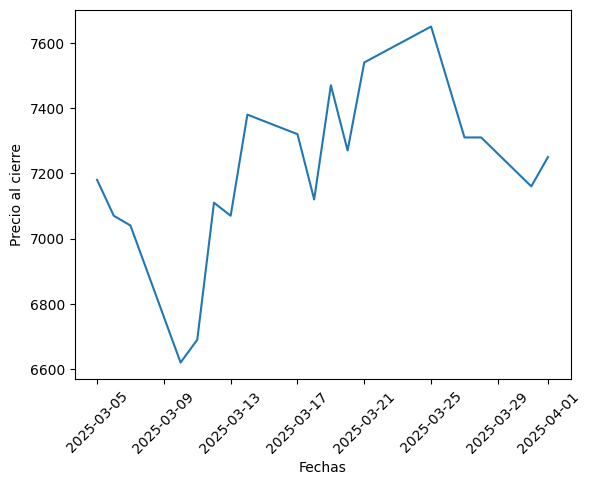

In [30]:
# ¿Cuales son los pasos básicos para la visualización usando matplotlib o seaborn? Tener en cuenta que no todo lo que
# vemos parece una columna sino que a veces tenemos indices.
plt.figure()
plt.xlabel("Fechas")
plt.ylabel("Precio al cierre")
plt.plot(data_ggal.index, data_ggal['Close'])
plt.xticks(rotation=45)
plt.show()

In [31]:
data_ggal.columns

MultiIndex([( 'Close', 'GGAL.BA'),
            (  'High', 'GGAL.BA'),
            (   'Low', 'GGAL.BA'),
            (  'Open', 'GGAL.BA'),
            ('Volume', 'GGAL.BA')],
           names=['Price', 'Ticker'])

<function matplotlib.pyplot.show(close=None, block=None)>

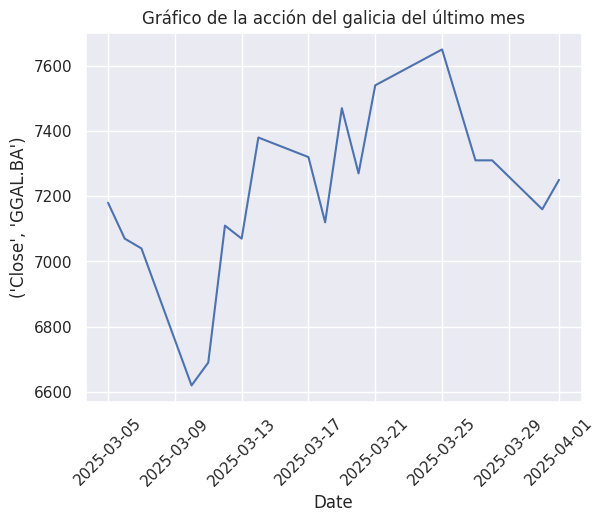

In [32]:
# Utilizamos la librería seaborn para realizar gráficos simples
sns.set_theme(style="darkgrid")
plt.title("Gráfico de la acción del galicia del último mes")
#sns.lineplot(x='Date', y= 'Close', data=data_ggal)
sns.lineplot(x='Date', y= ('Close', 'GGAL.BA'), data=data_ggal)
plt.xticks(rotation=45)
plt.show

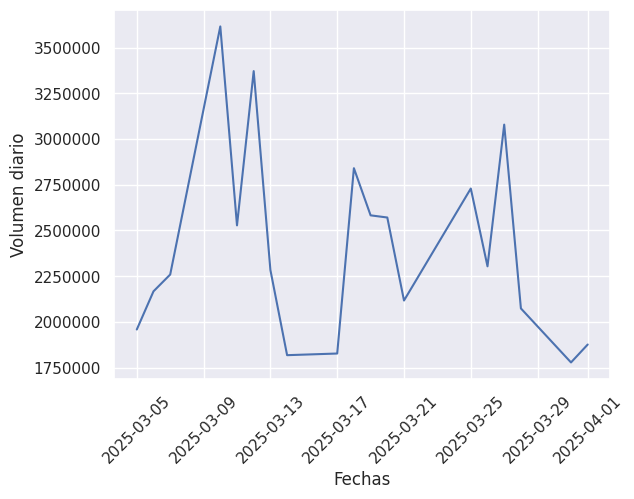

In [33]:
# También podemos graficar el volumen diario de este activo. En este caso, lo que hicimos es agregarle una
# sentencia adicional para eliminar la notación científica.
plt.figure()
plt.xlabel("Fechas")
plt.ylabel("Volumen diario")
plt.ticklabel_format(axis='y', style='plain')
plt.plot(data_ggal.index, data_ggal['Volume'])
plt.xticks(rotation=45)
plt.show()

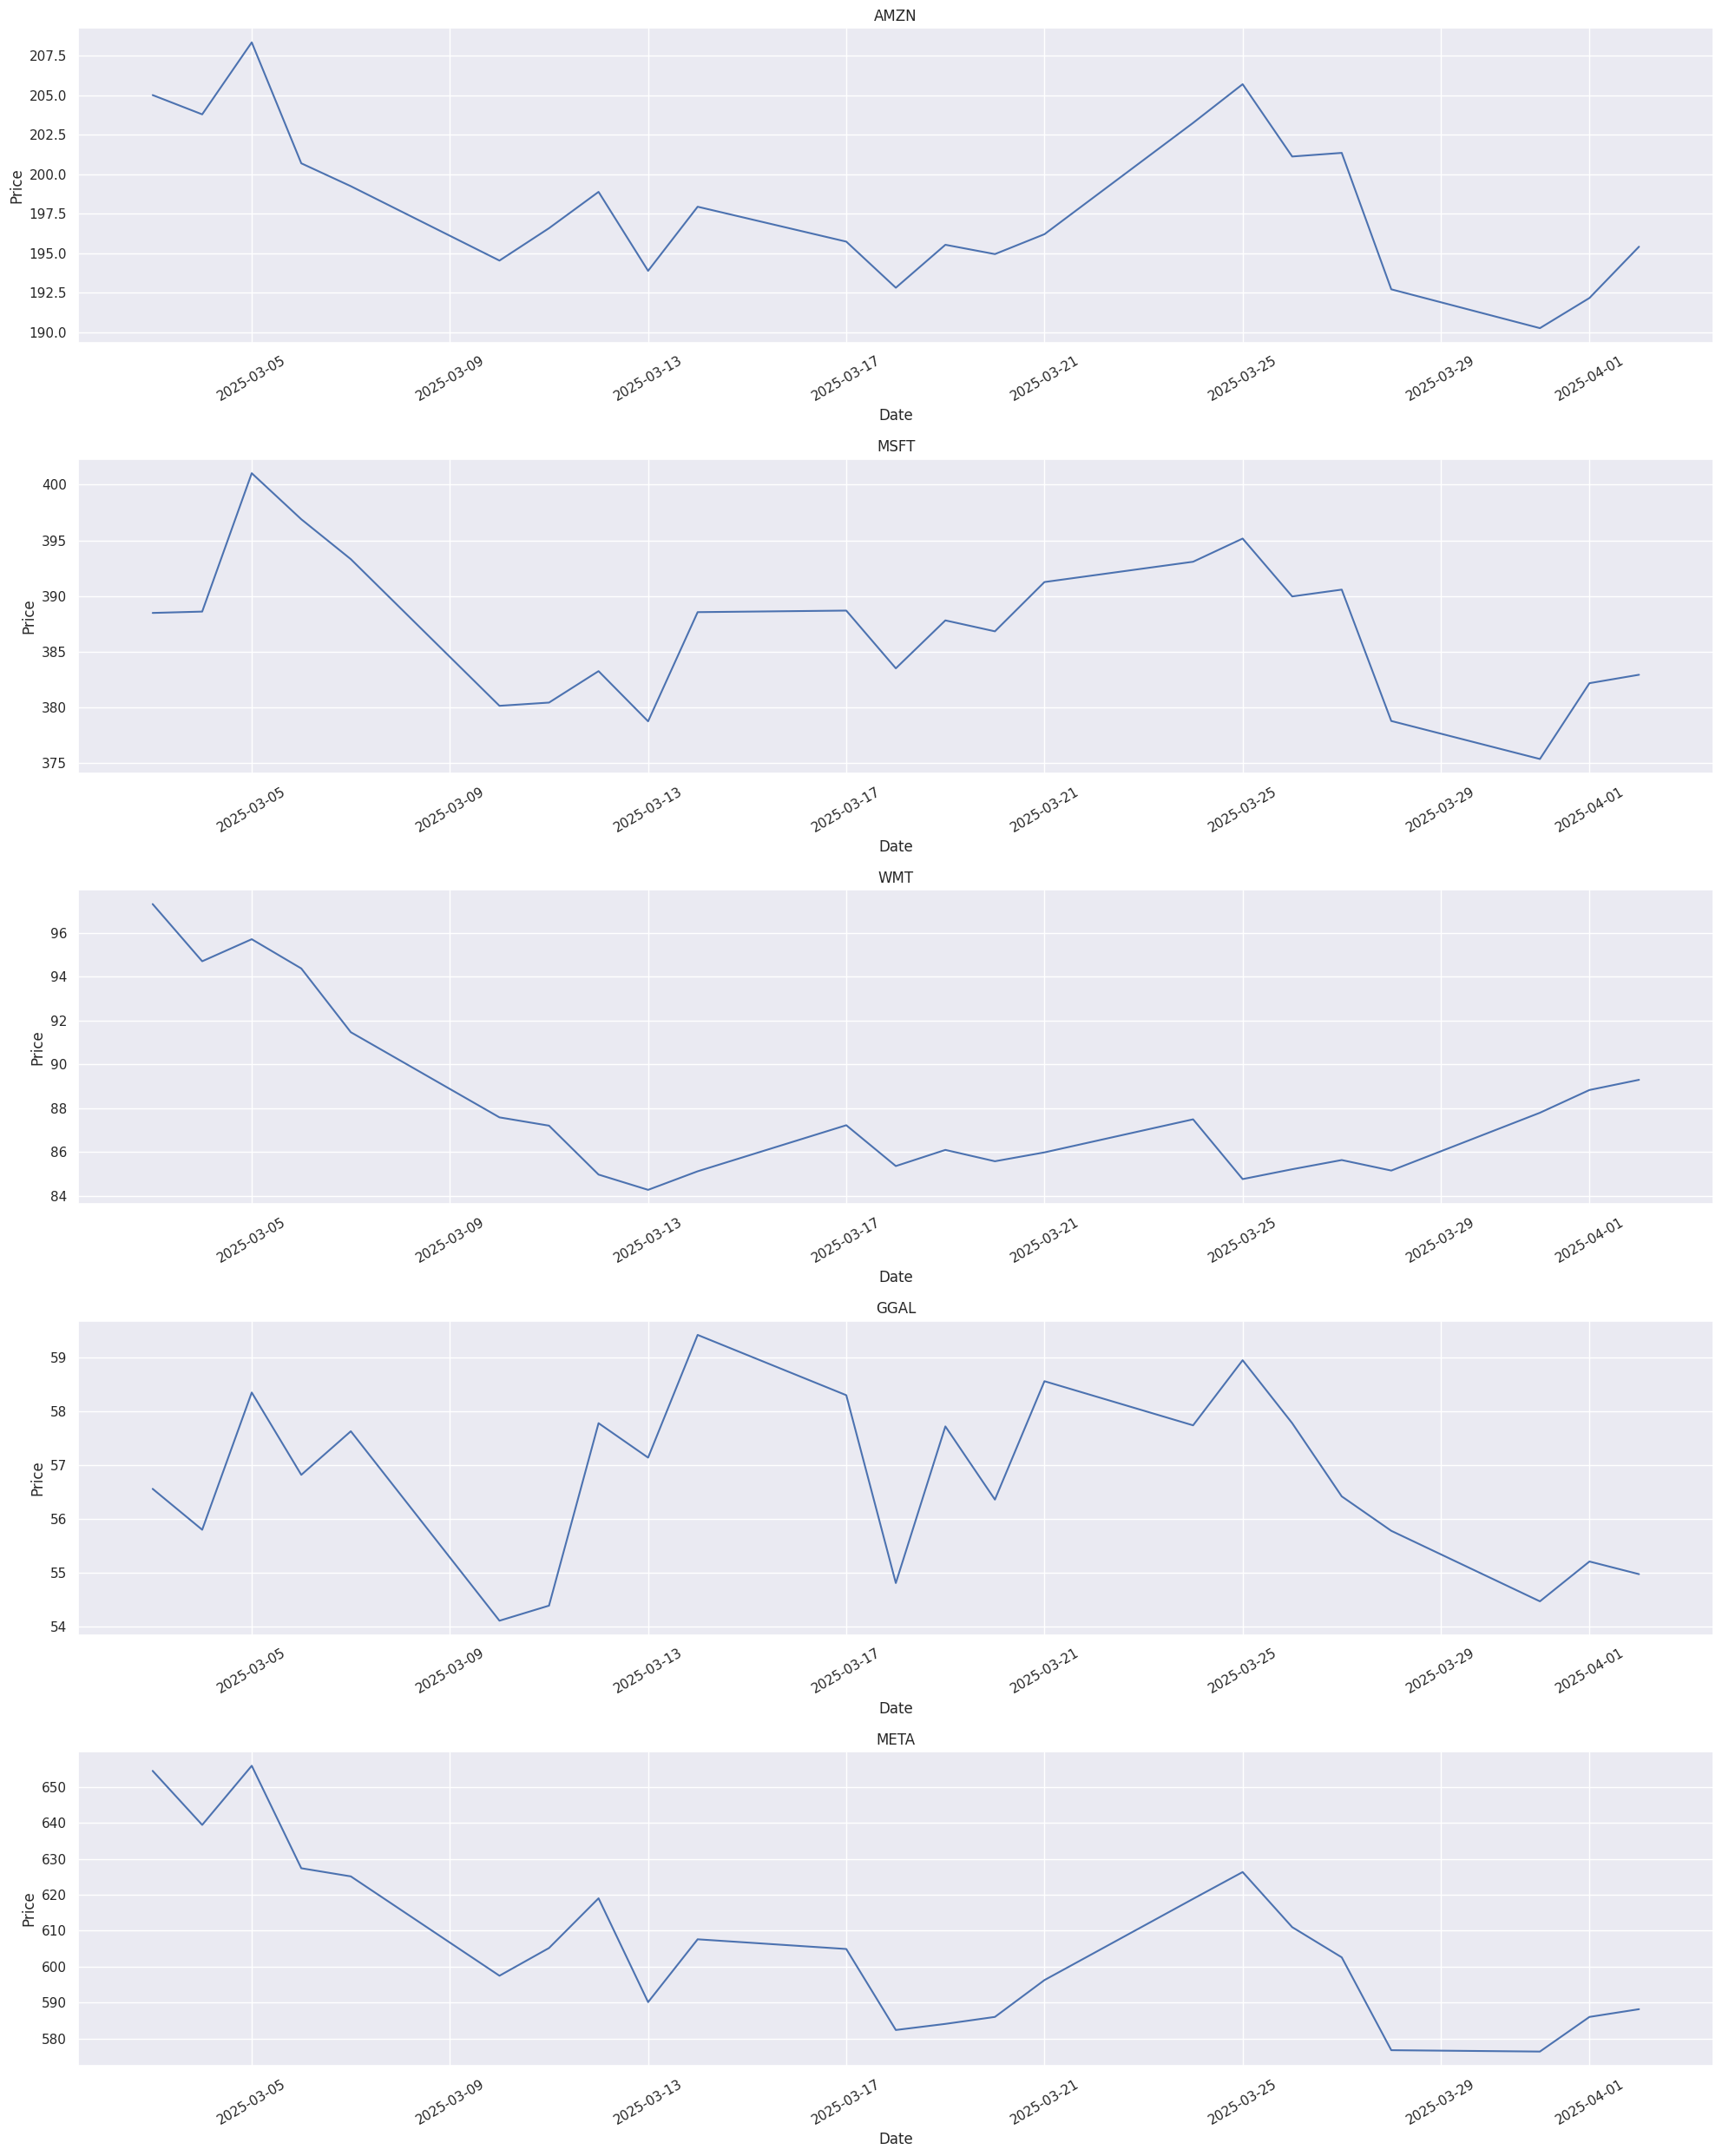

In [34]:
# También podemos recurrir al for loop para para realizar el gráfico del precio de las acciones por separado
# Se podría hacer todo junto pero en este caso sucede que las acciones estan en distintos niveles.
fig = plt.figure(figsize=(20,25))
for i in range(len(assets)):
    ax = plt.subplot(5,1,i+1)
    ax.plot(tickers_final.loc[tickers_final['Ticker'] == assets[i]]['Date'], tickers_final.loc[tickers_final['Ticker'] == assets[i]]['Close'], 'b')
    ax.set_title(assets[i])
    ax.set_xlabel("Date")
    ax.set_ylabel("Price")
    plt.xticks(rotation=30)
fig.tight_layout()